In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import sem
import matplotlib.cm as cm
import matplotlib



In [2]:
BASE_PATH_1 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-139/suite2p/plane0/"
BASE_PATH_2 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-140/suite2p/plane0/"

with open(BASE_PATH_1 + 'cells.pkl','rb') as f:
    cell_dict = pickle.load(f)

with open(BASE_PATH_2 + 'cells.pkl','rb') as f:
    cell_dict_2 = pickle.load(f)

In [3]:
nfreq = list(cell_dict[3]['traces'].keys())
nInt = list(cell_dict[3]['traces'][nfreq[0]].keys())
ntrial = list(cell_dict[3]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
matched_cells = cell_dict[3]['matched_cells']

print(matched_cells)

[[   2    7]
 [   3   16]
 [   5    1]
 [   6   24]
 [   8    5]
 [   9   58]
 [  10   43]
 [  12    2]
 [  13   69]
 [  14   11]
 [  15   46]
 [  16   44]
 [  18   62]
 [  19    9]
 [  20   78]
 [  21    8]
 [  22   50]
 [  23   12]
 [  24  264]
 [  25   72]
 [  26  404]
 [  27  128]
 [  28   65]
 [  30   71]
 [  32   93]
 [  34   57]
 [  35   67]
 [  37   70]
 [  38   61]
 [  42   89]
 [  45   15]
 [  47   42]
 [  48  141]
 [  49  132]
 [  50   37]
 [  51   85]
 [  53   64]
 [  54   22]
 [  55   17]
 [  56   79]
 [  57   51]
 [  59   68]
 [  60   91]
 [  61  165]
 [  62   55]
 [  64  111]
 [  66  156]
 [  67   31]
 [  68   32]
 [  69   98]
 [  70  177]
 [  71  526]
 [  72  315]
 [  73  378]
 [  74  305]
 [  75   13]
 [  76   35]
 [  77   66]
 [  78   53]
 [  79   18]
 [  80   60]
 [  81  120]
 [  82   81]
 [  83    6]
 [  85  221]
 [  86   14]
 [  90   83]
 [  91   88]
 [  92   34]
 [  93  211]
 [  94   74]
 [  95  189]
 [  96   75]
 [  97  598]
 [  99  247]
 [ 100  106]
 [ 102   49]

In [5]:
cells_1 = []

for cell in cell_dict:
    is_active = cell_dict[cell]['active']
    is_matched = cell in matched_cells[:, 0]
    

    if is_active and is_matched:
        cells_1.append(cell)

print(cells_1)

[6, 14, 18, 19, 20, 21, 22, 25, 26, 32, 34, 35, 37, 38, 42, 48, 50, 53, 56, 59, 64, 72, 74, 78, 81, 83, 90, 91, 92, 93, 94, 95, 97, 112, 117, 119, 129, 132, 133, 136, 139, 140, 141, 143, 146, 154, 155, 170, 172, 174, 182, 187, 192, 197, 198, 207, 212, 216, 220, 226, 231, 263, 265, 271, 281, 284, 285, 289, 293, 311, 316, 320, 327, 335, 354, 372, 374, 376, 416, 453, 481, 486, 496, 501, 503, 518, 529, 535, 554, 599, 654, 753, 756, 765, 773, 866, 1069, 1367, 1651]


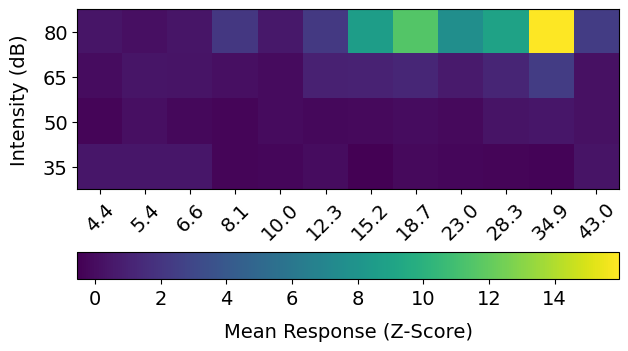

In [6]:
cell = 95

matrix = np.squeeze(np.array([[[cell_dict[cell]['deconvolved_traces'][i][j][k] for k in ntrial] for j in nInt] for i in nfreq]))
matrix_av = np.mean(matrix,axis=2)
matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)
flipped_data = np.fliplr(matrix_res)

from scipy.ndimage import gaussian_filter

sigma = 0.5  # Standard deviation for Gaussian kernel
smoothed_data = gaussian_filter(flipped_data, sigma=sigma)

fig,ax = plt.subplots()

plt.imshow(smoothed_data.T,cmap='viridis')
plt.yticks(np.arange(smoothed_data.shape[1]), ['80', '65', '50', '35'], fontsize=14)
plt.xticks(np.arange(smoothed_data.shape[0]), ['4.4','5.4', '6.6','8.1', '10.0','12.3', '15.2','18.7','23.0','28.3','34.9','43.0'], fontsize=14,rotation=45)
plt.ylabel("Intensity (dB)",fontsize=14,labelpad=10)
plt.xlabel("Frequency (kHz)",fontsize=14,labelpad=10)
norm = matplotlib.colors.Normalize(vmin=np.min(smoothed_data),vmax=np.max(smoothed_data))
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis',norm=norm), ax=ax, orientation='horizontal')
cbar.ax.set_xlabel("Mean Response (Z-Score)",fontsize=14,labelpad=10)
cbar.ax.tick_params(labelsize=14)


plt.tight_layout()

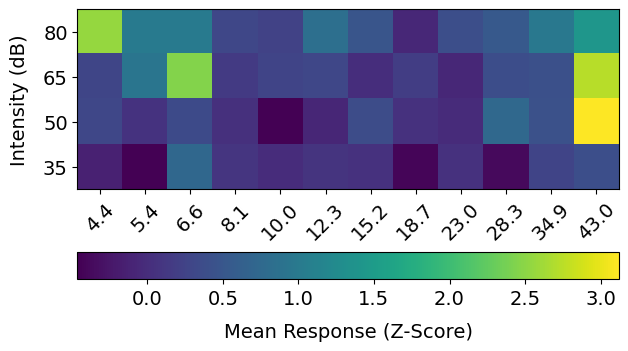

In [13]:
cell = 150

matrix = np.squeeze(np.array([[[cell_dict_2[cell]['deconvolved_traces'][i][j][k] for k in ntrial] for j in nInt] for i in nfreq]))
matrix_av = np.mean(matrix,axis=2)
matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)
flipped_data = np.fliplr(matrix_res)

from scipy.ndimage import gaussian_filter

sigma = 0.5  # Standard deviation for Gaussian kernel
smoothed_data = gaussian_filter(flipped_data, sigma=sigma)

fig,ax = plt.subplots()

plt.imshow(smoothed_data.T,cmap='viridis')
plt.yticks(np.arange(smoothed_data.shape[1]), ['80', '65', '50', '35'], fontsize=14)
plt.xticks(np.arange(smoothed_data.shape[0]), ['4.4','5.4', '6.6','8.1', '10.0','12.3', '15.2','18.7','23.0','28.3','34.9','43.0'], fontsize=14,rotation=45)
plt.ylabel("Intensity (dB)",fontsize=14,labelpad=10)
plt.xlabel("Frequency (kHz)",fontsize=14,labelpad=10)
norm = matplotlib.colors.Normalize(vmin=np.min(smoothed_data),vmax=np.max(smoothed_data))
cbar = plt.colorbar(cm.ScalarMappable(cmap='viridis',norm=norm), ax=ax, orientation='horizontal')
cbar.ax.set_xlabel("Mean Response (Z-Score)",fontsize=14,labelpad=10)
cbar.ax.tick_params(labelsize=14)


plt.tight_layout()

PLOT RAW TRACES:

In [14]:
baseline = np.mean(matrix[:,:,:,:5])

baseline_subtracted = matrix[:,:,:,5:] - baseline

print(baseline_subtracted.shape)

matrix_mean = np.mean(baseline_subtracted,axis=2)

(12, 4, 10, 10)


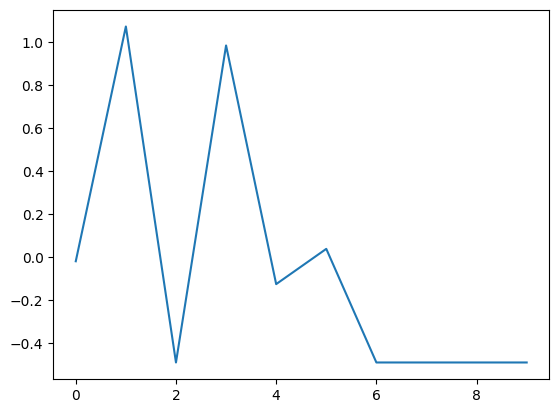

In [15]:
plt.plot(matrix_mean[4,1,:])

In [16]:
"""
Plot the tuning traces for a single cell
@param cell_traces: the contents of the 'traces' key for a single cell in the big dictionary
@param n_frequencies: the total number of unique frequencies presented during the recording
@param n_intensities: the total number of unique intensities presented during the recording
@param y_limit: how tall the y axis should be for each subplot
"""
def plot_tuning_traces(cell_traces,n_frequencies,n_intensities,y_limit):

    fig,axs = plt.subplots(n_intensities,n_frequencies,sharex='col',sharey='row',figsize=(14,5))

    all_trials = np.zeros([10,15])

    for row,freq in zip(range(n_frequencies),cell_traces.keys()):
        for col,itsy in zip(range(n_intensities),reversed(list(cell_traces[freq].keys()))):
            for i,rep in enumerate(cell_traces[freq][itsy]):
                # for rep in cell_traces[freq][itsy]:
                #     axs[col,row].plot(cell_traces[freq][itsy][rep],color='grey') # plot every trial

                    all_trials[i,:] = cell_traces[freq][itsy][rep]
            trial_mean = np.mean(all_trials,axis=0)
            yerr = np.std(all_trials, axis=0)
            x = range(len(yerr))
            axs[col,row].plot(trial_mean,color='b') # plot every trial
            x = range(len(yerr))
            y = np.squeeze(trial_mean)
            axs[col,row].fill_between(x, y - yerr, y + yerr, color='lightblue', alpha=0.5, label='Standard Error')

            # # miscellaneous formatting
            axs[col,row].set_xticks([])
            axs[col,row].set_yticks([])
            # if row==0:
            #     axs[col,row].set_ylabel(itsy,fontsize=12) # add the intensity to the far left edge
            # if col==n_intensities-1:
            #     axs[col,row].set_xlabel(freq) # add the frequency at the bottom
            axs[col,row].axvline(x=5,color='r',linestyle='--',alpha=0.2)
            axs[col,row].set_ylim(bottom=0,top=y_limit)
            axs[col,row].autoscale(enable=True, axis='x', tight=True)

    fig.subplots_adjust(wspace=0,hspace=0)
    # fig.text(0.5,0.01,"Frequency (Hz)",va='center',ha='center')
    # fig.text(0.085,0.5,"Intensity (dB)",va='center',ha='center',rotation='vertical',fontsize=12)
    # fig.suptitle(cell)
    plt.show(block=False)

In [26]:
def plot_tuning_traces(cell_traces, n_frequencies, n_intensities, y_limit):
    fig, axs = plt.subplots(n_intensities, n_frequencies, sharex='col', sharey='row', figsize=(14, 5))

    all_trials = np.zeros([10, 15])

    for row, freq in zip(range(n_frequencies), cell_traces.keys()):
        for col, itsy in zip(range(n_intensities), reversed(list(cell_traces[freq].keys()))):
            for i, rep in enumerate(cell_traces[freq][itsy]):
                all_trials[i, :] = cell_traces[freq][itsy][rep]
            trial_mean = np.mean(all_trials, axis=0)
            print(trial_mean)
            yerr = np.std(all_trials, axis=0)
            x = range(len(yerr))
            axs[col, row].plot(trial_mean, color='b')
            y = np.squeeze(trial_mean)
            axs[col, row].fill_between(x, y - yerr, y + yerr, color='lightblue', alpha=0.5, label='Standard Error')

            # Miscellaneous formatting
            axs[col, row].set_xticks([])
            # axs[col, row].set_yticks([])
            axs[col, row].axvline(x=5, color='r', linestyle='--', alpha=0.2)
            # axs[col, row].set_ylim(bottom=0, top=y_limit)
            axs[col, row].autoscale(enable=True, axis='x', tight=True)

    # Add scale bars to the bottom-right subplot
    bottom_right_ax = axs[n_intensities - 1, n_frequencies - 1]
    


    fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjusted spacing
    plt.tight_layout()
    plt.show(block=False)

[116.76724243 117.18406372 110.82190399 121.54942322 111.47777252
 111.38686829 112.94985199 107.19846954 101.61570435 108.74832916
 110.79866028 108.23506165 104.74731598 105.61035767 109.99226532]
[103.98022003 115.55924225 116.72088776 116.80348053 112.7507309
 108.60143433 106.30202484 114.32223206 116.40993805 114.74948883
 120.30801086 120.19481201 126.48890533 107.73797607 112.89465332]
[118.59508057 115.56884003 115.4301239  112.83663635 108.82556305
 110.91040039 112.50308685 113.84807892 107.5617218  114.20779266
 110.11420593 111.61021881 106.02099915 106.17958069 110.61208344]
[118.41409454 120.82650299 113.91997223 116.95090485 111.10374451
 120.16394958 115.10128326 111.8107666  105.9233902  113.06608124
 112.61631775 126.78893661 124.44301147 121.22019196 116.99190521]
[111.53398361 112.82094574 114.11667557 114.60102386 110.47698135
 106.03457489 110.61790924 107.02879333 109.60557709 114.90158386
 113.6905838  111.09797974 115.6031723  113.1151886  111.23461227]
[124.4

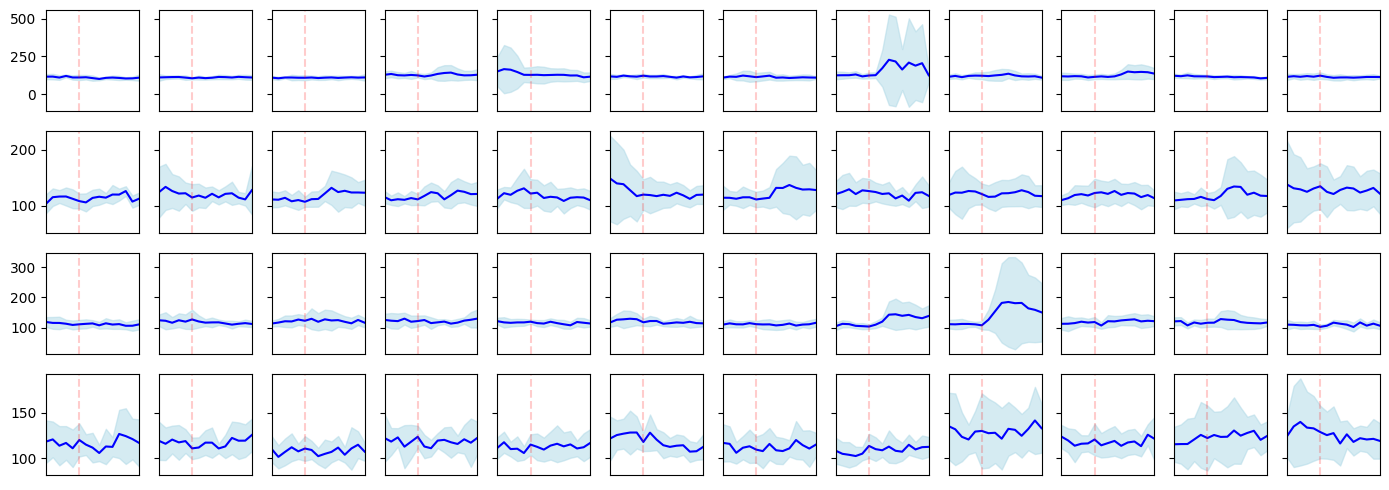

In [27]:
plot_tuning_traces(cell_dict[cell]['traces'],12,4,160)

In [ ]:
path = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_13012023_saline/TSeries-01122023-1243-040/suite2p/plane0/"

raw_traces = np.load(path + 'raw_corrected_traces.npy')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 5))
axes[0].plot(raw_traces[17, 4000:6501])
axes[1].plot(raw_traces[45, 4000:6501], color='orange')
axes[2].plot(raw_traces[14, 4000:6501], color='r')

# Remove the top, right, and left spines for the first two plots
for ax in axes[:-1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)  # Hide Y axis ticks and labels
    ax.get_xaxis().set_visible(False)  # Hide X axis ticks and labels

# Remove the top and right spines for the bottom plot
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].set_xticks([0,500,1000,1500,2000,2500],[0,50,100,150,200,250],fontsize=14)
axes[2].set_yticks([500],[1000])
axes[2].set_xlabel("Time (s)",fontsize=14)
axes[2].set_ylabel("ΔF/Fo",fontsize=14)

plt.show()